In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

In [3]:
def calculateErrorSurface(x1, x2, y):
    """Generate data points for plotting the error surface."""
    
    # Number of examples.
    N = len(y)
    
    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-20.0, 24.0, M)
    a2 = np.linspace(-20.0, 24.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat));            
            
    return J, A1, A2

def batchGradientDescent(X, y, alpha, n_iterations):
    """Batch gradient descent solution."""
    
    # Number of examples.
    N = len(y)
    
    # Initialize error history with zeros.
    Jgd = np.zeros(n_iterations+1)
    
    # Random initialization of parameters.
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)
    
    # MSE for the intial set of weights.
    h = X.dot(a)
    Jgd[0] = (1.0/N)*np.sum(np.power(y - h, 2))

    # Batch gradient-descent loop.
    error = 1
    iteration = 0
    while iteration < n_iterations and error > 1e-3:
        
        # Calculate the gradient vector.
        h = X.dot(a)
        gradients = -(2.0/N)*X.T.dot(y - h)
    
        # Update the weights.
        a = a - alpha * gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        
        # MSE for the current weight vector.
        h = X.dot(a)
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - h), 2))

        # Absolute error between subsequent iterations.
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        
        # Epoch's counter.
        iteration += 1
        
    return a, a_hist, Jgd, iteration

### Definição do número de exemplos.

In [4]:
# Number of pairs feature/label.
N = 10000

### Modelo Gerador: $x_1 \gg x_2$

Os atributos são

$$x_1 = 2 * \text{randn()}$$

$$x_2 = \text{randn()}$$

A função verdadeira é dada por

$$y = 0.5 x_1 + x_2,$$

onde $a_1$ e $a_2$ são iguais a $0.5$ e $1$, respectivamente.

In [5]:
# Input values (features)
x1 = 2*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = 0.5*x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

### Histograma dos atributos.

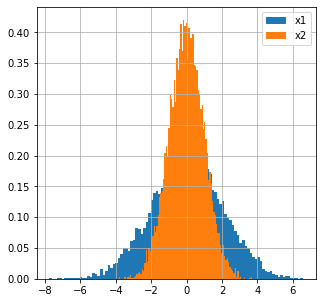

In [6]:
fig = plt.figure(figsize=(5,5))
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.legend()
plt.grid()
#plt.savefig("hist_molde1.png", dpi=600)
plt.show()

#### Observação

+ O intervalo de variação de $x_1$ é maior do que o de $x_2$.

### Superfície de erro.

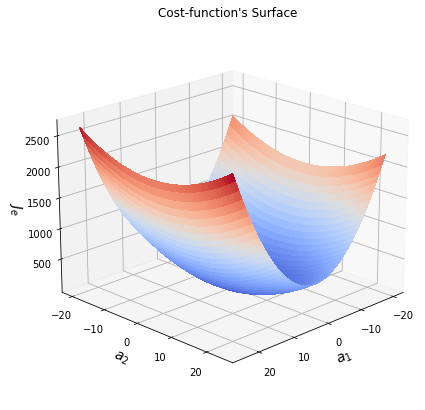

In [7]:
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#plt.savefig("error_surface_model1.png", dpi=600)
#Show the plot.
plt.show()

#### Observação

+ Quando $x_1 \gg x_2$: erro varia mais rapidamente com variações de $\hat{a}_1$, resultando em um formato de vale.

### Superfície de contorno.

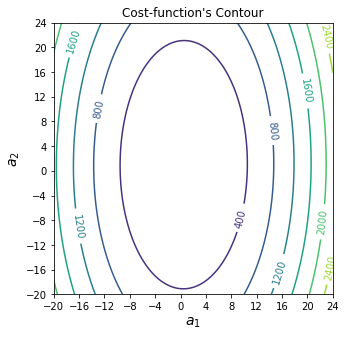

In [8]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

### Aprendizado do gradiente descendente em batelada nesta superfície.

Antes de realizarmos o treinamento do GD, vamos dividir o conjunto total de exemplos em conjuntos de treinamento e validação.

A função hipótese tem o seguinte formato

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

In [9]:
# Concatenamos os dois vetores de atributos para formar a matriz de atributos.
X = np.c_[x1, x2]

# Split the dataset into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=seed)

Agora, encontramos a solução ótima com a equação normal.

In [10]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X_train).dot(X_train)).dot(np.transpose(X_train).dot(y_train))

# Print a1 and a2 weights.
print('peso a1:', a_opt[0,0])
print('peso a2:', a_opt[1,0])

# Perform predictions.
y_pred_train = X_train.dot(a_opt)
y_pred_test = X_test.dot(a_opt)

# Calculate the mean squared error.
mse_train = (1.0/len(y_train))*np.sum(np.power((y_train - y_pred_train), 2))

mse_test = (1.0/len(y_test))*np.sum(np.power((y_test - y_pred_test), 2))

# Plot the MSE.
print('')
print('MSE train:', mse_train)
print('MSE test:', mse_test)

peso a1: 0.5005685743043478
peso a2: 0.999339053176992

MSE train: 1.0032092611350576
MSE test: 0.96331639772779


Na sequência, treinamos o GD em batelada com o conjunto de treinamento.

In [11]:
# Learning step.
alpha = 0.1

# Maximum number of iterations.
n_iterations = 100

# Train the gradient descent.
a, a_hist, Jgd, iteration = batchGradientDescent(X_train, y_train, alpha, n_iterations)

# Print a1 and a2 weights.
print('peso a1:', a[0,0])
print('peso a2:', a[1,0])

# Perform predictions.
y_pred_train = X_train.dot(a)
y_pred_test = X_test.dot(a)

# Calculate the mean squared error.
mse_train = (1.0/len(y_train))*np.sum(np.power((y_train - y_pred_train), 2))

mse_test = (1.0/len(y_test))*np.sum(np.power((y_test - y_pred_test), 2))

# Plot the MSE.
print('')
print('MSE train:', mse_train)
print('MSE test:', mse_test)

peso a1: 0.5002516283492069
peso a2: 0.9571033619937543

MSE train: 1.0049851074050238
MSE test: 0.9652988942661943


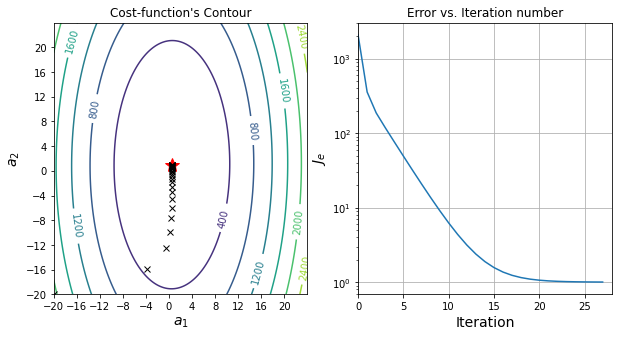

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

cp = ax1.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Cost-function\'s Contour')
ax1.plot(a[0], a[1], c='r', marker='*', markersize=14)
ax1.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
ax1.set_xticks(np.arange(-20, 24, step=4.0))
ax1.set_yticks(np.arange(-20, 24, step=4.0))

ax2.plot(np.arange(0, iteration), Jgd[0:iteration])
ax2.set_xlim((0, iteration))
ax2.set_yscale('log')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Error vs. Iteration number')
ax2.grid()

plt.show()

#### Observação

+ O GD sempre caminha na direção de máxima declividade, mas aqui, ele não aponta (caminha) diretamente para o ponto de mínimo global.


+ Inicialmente, a direção de máxima declividade está quase que paralela ao eixo do peso $a_1$, pois $x_1$ tem intervalo de variação maior.


+ Porém, quando o algoritmo chega à base do vale, a inclinação se torna pequena, fazendo com que o gradiente também seja pequeno, consequentemente, as atualização dos pesos serão pequenas.
    + Convergência lenta devido ao formato da superfície.
    + Convergência só ocorre após 20 épocas.

### Padronização dos atributos.

Nesta parte do exemplo, iremos padronizar os atributos de tal forma a deixar a superfície de erro mais circular.

#### Aplicando a padronização dos atributos.

+ Utilizamos a classe `StandardScaler` do módulo `preprocessing` da biblioteca SciKit-Learn.
+ O método `fit_transform` calcula a média e o devio padrão de cada atributo e, em seguida, aplica a padronização a cada exemplo da base de dados.
+ Os parâmetros de padronização (média e variância) são calculados com o conjunto de treinamento e aplicados na padronização do conjunto de validação, ou seja, não se calcula os parâmetros de padronização para o conjunto de validação, apenas se utiliza os parâmetros calculados com o conjunto de treinamento.

In [13]:
# Import Class StandardScaler from module Preprocessing of library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the training set.
scaled_X_train = stdScaler.fit_transform(X_train)

# Standardize the validation set.
# OBS.: Here we use the transform method, which only standardize the dataset with the parameters calculated for the training set.
scaled_X_test = stdScaler.transform(X_test)

### Histograma dos atributos padronizados.

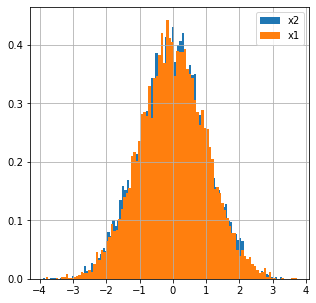

In [14]:
scaled_x1_train = scaled_X_train[:,0].reshape(len(y_train),1)
scaled_x2_train = scaled_X_train[:,1].reshape(len(y_train),1)

fig = plt.figure(figsize=(5,5))
plt.hist(scaled_x1_train, bins=100, density=True, label='x2')
plt.hist(scaled_x2_train, bins=100, density=True, label='x1')
plt.legend()
plt.grid()
#plt.savefig("hist_molde3.png", dpi=600)
plt.show()

#### Observação

+ O intervalo de variação dos dois atributos é semelhante.

### Superfície de erro.

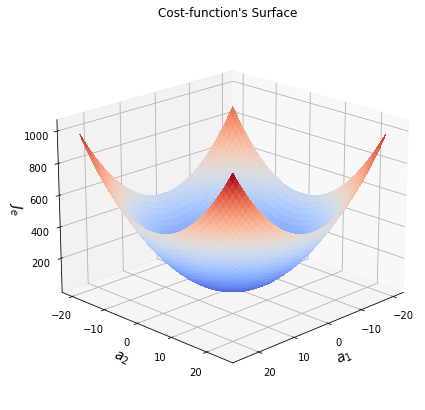

In [15]:
J, A1, A2 = calculateErrorSurface(scaled_x1_train, scaled_x2_train, y_train)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#plt.savefig("error_surface_model3.png", dpi=600)
#Show the plot.
plt.show()

#### Observação

+ Quando $x_1$ e $x_2$ têm intervalos de variação semelhantes, então, a variação tanto de $\hat{a}_1$ quanto de $\hat{a}_2$ tem peso semelhante na variação do erro, fazendo com que a superfície tenha um formato de tigela.

### Superfície de contorno.

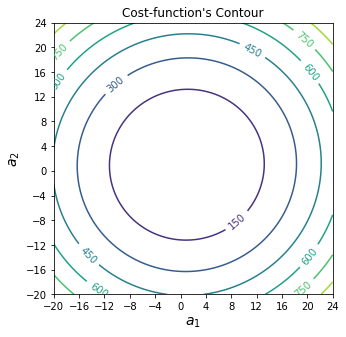

In [16]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

#### Observação

+ Observem que a superfície se tornou mais circular, indicando que o erro varia similarmente em ambas as direções, i.e., $a_1$ e $a_2$.

Abaixo, encontramos os pesos ótimos com a equação normal para o **conjunto de treinamento padronizado**.

In [17]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(scaled_X_train).dot(scaled_X_train)).dot(np.transpose(scaled_X_train).dot(y_train))

# Print a1 and a2 weights.
print('peso a1 (EN):', a_opt[0,0])
print('peso a2 (EN):', a_opt[1,0])

# Perform predictions.
y_pred_train = scaled_X_train.dot(a_opt)
y_pred_test = scaled_X_test.dot(a_opt)

# Calculate the mean squared error.
mse_train = (1.0/len(y_train))*np.sum(np.power((y_train - y_pred_train), 2))

mse_test = (1.0/len(y_test))*np.sum(np.power((y_test - y_pred_test), 2))

# Plot the MSE.
print('')
print('MSE train padronizado:', mse_train)
print('MSE test padronizado:', mse_test)

peso a1 (EN): 0.9959686986988306
peso a2 (EN): 0.9971464207087687

MSE train padronizado: 1.0036086789627128
MSE test padronizado: 0.9641680684413011


#### Observação

+ Percebam que o valor do peso $a_1$ é bem diferente do encontrado com a equação normal sem a padronização. 
+ Já o valor do peso $a_2$ é semelhante ao encontrado com a equação normal sem a padronização. 
+ Na verdade, ambos os valores dos pesos são modificados (o peso $a_1$ mais do que o peso $a_2$) pois a padronização altera os valores dos atributos os quais são usados para encontrar os valores dos pesos que minimizam a função de erro, tanto na equação normal quanto com o gradiente descendente. 
    + Ou seja, como os valores dos atributos foram alterados (padronizados), o ponto ótimo dos pesos também é alterado.
+ A normalização afeta muito mais o valor do peso $a_1$ pois o atributo associado, $x_1$ tem uma variância bem maior. 
+ Já o peso $a_2$ permanece bem semelhante ao encontrado com a equação normal sem a padronização, pois o atributo $x_2$ já possui variância unitária.

### Aprendizado do gradiente descendente em batelada nesta superfície.

**OBS**.: Note que estamos usando a matriz de atributos padronizada.

In [18]:
# Learning step.
alpha = 0.3

# Maximum number of epochs.
n_iterations = 100

# Train the batch gradient descent model.
a, a_hist, Jgd, iteration = batchGradientDescent(scaled_X_train, y_train, alpha, n_iterations)

# Print a1 and a2 weights.
print('peso a1 (GD):', a[0,0])
print('peso a2 (GD):', a[1,0])

# Perform predictions.
y_pred_train = scaled_X_train.dot(a)
y_pred_test = scaled_X_test.dot(a)

# Calculate the mean squared error.
mse_train = (1.0/len(y_train))*np.sum(np.power((y_train - y_pred_train), 2))

mse_test = (1.0/len(y_test))*np.sum(np.power((y_test - y_pred_test), 2))

# Plot the MSE.
print('')
print('MSE train padronizado:', mse_train)
print('MSE test padronizado:', mse_test)

peso a1 (GD): 0.9895810304764869
peso a2 (GD): 0.9907584871287993

MSE train padronizado: 1.003689379414132
MSE test padronizado: 0.9644171233581547


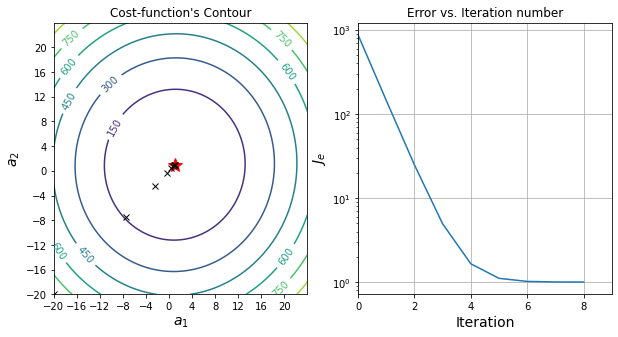

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

cp = ax1.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Cost-function\'s Contour')
ax1.plot(a[0], a[1], c='r', marker='*', markersize=14)
ax1.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
ax1.set_xticks(np.arange(-20, 24, step=4.0))
ax1.set_yticks(np.arange(-20, 24, step=4.0))

ax2.plot(np.arange(0, iteration), Jgd[0:iteration])
ax2.set_xlim((0, iteration))
ax2.set_yscale('log')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Error vs. Iteration number')
ax2.grid()

plt.show()

#### Observação

+ O GD sempre caminha na direção de máxima declividade e, aqui, devido à variação do erro ser similar em todas as direções, ele aponta (caminha) diretamente para o ponto de mínimo global.


+ A direção de máxima declividade está exatamente entre os eixos de $a_1$ e $a_2$ (i.e., $45^o$), pois $x_1$ e $x_2$ têm intervalos de variação similares.


+ Convergência rápida devido ao formato de tigela (circular) da superfície.
    + Em aproximadamente 6 épocas já temos convergência.